# Census Data (Race) in the City of Los Angeles

**Step 1**: import pandas, geopandoa, contextily and matplotlib.

In [3]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

**Step 2**: import census data file (geojson)

In [4]:
gdf = gpd.read_file('acs2019_5yr_B02001_14000US06037293306.geojson')

**Step 3**: have a preliminary inspection fo the data, including numbers of rows, columns, first and last five rows of the dataset

In [5]:
gdf.shape

(1005, 23)

In [6]:
gdf.head()

,geoid,name,B02001001,"B02001001, Error",B02001002,"B02001002, Error",B02001003,"B02001003, Error",B02001004,"B02001004, Error",...,"B02001006, Error",B02001007,"B02001007, Error",B02001008,"B02001008, Error",B02001009,"B02001009, Error",B02001010,"B02001010, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,3347.0,353.0,19.0,15.0,3.0,6.0,...,6.0,391.0,312.0,189.0,85.0,34.0,28.0,155.0,83.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,2981.0,343.0,74.0,102.0,15.0,24.0,...,12.0,48.0,55.0,67.0,65.0,0.0,12.0,67.0,65.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,484.0,4647.0,612.0,198.0,165.0,0.0,17.0,...,17.0,921.0,507.0,95.0,83.0,48.0,62.0,47.0,56.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,276.0,2634.0,337.0,87.0,107.0,0.0,12.0,...,12.0,497.0,231.0,143.0,87.0,11.0,18.0,132.0,86.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,394.0,3350.0,394.0,205.0,232.0,0.0,12.0,...,12.0,45.0,38.0,90.0,55.0,28.0,32.0,62.0,44.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [7]:
gdf.tail()

,geoid,name,B02001001,"B02001001, Error",B02001002,"B02001002, Error",B02001003,"B02001003, Error",B02001004,"B02001004, Error",...,"B02001006, Error",B02001007,"B02001007, Error",B02001008,"B02001008, Error",B02001009,"B02001009, Error",B02001010,"B02001010, Error",geometry
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",26.0,18.0,10.0,10.0,11.0,11.0,0.0,12.0,...,12.0,4.0,8.0,1.0,4.0,0.0,12.0,1.0,4.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",1175.0,178.0,636.0,107.0,246.0,103.0,37.0,39.0,...,31.0,98.0,47.0,84.0,34.0,51.0,33.0,33.0,26.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
1004,16000US0644000,"Los Angeles, CA",3966936.0,82.0,2065172.0,10915.0,354169.0,4600.0,28840.0,1820.0,...,931.0,902495.0,10617.0,148901.0,4539.0,36796.0,2103.0,112105.0,3737.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


**Step 4**: plot the dataset to gain a visualization of the area

<AxesSubplot:>

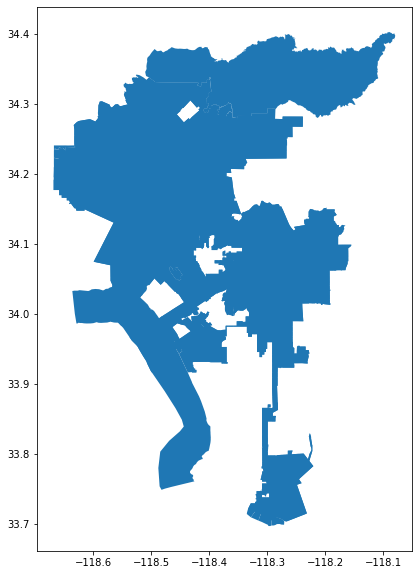

In [8]:
gdf.plot(figsize=(10,10))

**Step 5**: look at the data types

In [9]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             1005 non-null   object  
 1   name              1005 non-null   object  
 2   B02001001         1005 non-null   float64 
 3   B02001001, Error  1005 non-null   float64 
 4   B02001002         1005 non-null   float64 
 5   B02001002, Error  1005 non-null   float64 
 6   B02001003         1005 non-null   float64 
 7   B02001003, Error  1005 non-null   float64 
 8   B02001004         1005 non-null   float64 
 9   B02001004, Error  1005 non-null   float64 
 10  B02001005         1005 non-null   float64 
 11  B02001005, Error  1005 non-null   float64 
 12  B02001006         1005 non-null   float64 
 13  B02001006, Error  1005 non-null   float64 
 14  B02001007         1005 non-null   float64 
 15  B02001007, Error  1005 non-null   float64 
 16  B02001008       

**Step 6**: locate the data representing the total number in the city (row 1004)

In [10]:
gdf.geoid.tail()

1000    14000US06037980026
1001    14000US06037980028
1002    14000US06037980031
1003    14000US06037990200
1004        16000US0644000
Name: geoid, dtype: object

**Step 7**: delete city row

In [11]:
gdf = gdf.drop(1004)

**Step 8**: confirm the row is dropped

In [12]:
gdf.tail()

,geoid,name,B02001001,"B02001001, Error",B02001002,"B02001002, Error",B02001003,"B02001003, Error",B02001004,"B02001004, Error",...,"B02001006, Error",B02001007,"B02001007, Error",B02001008,"B02001008, Error",B02001009,"B02001009, Error",B02001010,"B02001010, Error",geometry
999,14000US06037980024,"Census Tract 9800.24, Los Angeles, CA",223.0,75.0,161.0,69.0,31.0,34.0,6.0,9.0,...,12.0,14.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.51849 34.18389, -118.5184..."
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",26.0,18.0,10.0,10.0,11.0,11.0,0.0,12.0,...,12.0,4.0,8.0,1.0,4.0,0.0,12.0,1.0,4.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",1175.0,178.0,636.0,107.0,246.0,103.0,37.0,39.0,...,31.0,98.0,47.0,84.0,34.0,51.0,33.0,33.0,26.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


**Step 9**: generate existing columns as a list

In [13]:
list(gdf)

['geoid',
 'name',
 'B02001001',
 'B02001001, Error',
 'B02001002',
 'B02001002, Error',
 'B02001003',
 'B02001003, Error',
 'B02001004',
 'B02001004, Error',
 'B02001005',
 'B02001005, Error',
 'B02001006',
 'B02001006, Error',
 'B02001007',
 'B02001007, Error',
 'B02001008',
 'B02001008, Error',
 'B02001009',
 'B02001009, Error',
 'B02001010',
 'B02001010, Error',
 'geometry']

**Step 10**: create a variable "columns_to_keep" and list the desired kept columns

In [14]:
columns_to_keep = ['geoid',
                   'name',
                   'B02001001',
                   'B02001002',
                   'B02001003',
                   'B02001004',
                   'B02001005',
                   'B02001006',
                   'B02001007',
                   'B02001008',
                   'B02001009',
                   'B02001010',
                   'geometry']

**Step 11**: redefine gdf with "columns_to_keep"

In [15]:
gdf = gdf[columns_to_keep]

**Step 12**: check the data

In [16]:
gdf.head()

,geoid,name,B02001001,B02001002,B02001003,B02001004,B02001005,B02001006,B02001007,B02001008,B02001009,B02001010,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3347.0,19.0,3.0,331.0,3.0,391.0,189.0,34.0,155.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,2981.0,74.0,15.0,220.0,0.0,48.0,67.0,0.0,67.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,4647.0,198.0,0.0,486.0,0.0,921.0,95.0,48.0,47.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2634.0,87.0,0.0,341.0,0.0,497.0,143.0,11.0,132.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3350.0,205.0,0.0,194.0,0.0,45.0,90.0,28.0,62.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


**Step 13**: confirm the error columns are dropped

In [17]:
list(gdf)

['geoid',
 'name',
 'B02001001',
 'B02001002',
 'B02001003',
 'B02001004',
 'B02001005',
 'B02001006',
 'B02001007',
 'B02001008',
 'B02001009',
 'B02001010',
 'geometry']

**Step 14**: rename the columns

In [18]:
gdf.columns = ['geoid',
               'name',
               'Total',
               'White alone',
               'Black or African American alone',
               'American Indian and Alaska Native alone',
               'Asian alone',
               'Native Hawaiian and Other Pacific Islander alone',
               'Some other race alone',
               'Two or more races',
               'Two races including Some other race',
               'Two races excluding Some other race, and three or more races',
               'geometry']
               
               

**Step 15**: confirm the column names are changed

In [19]:
gdf.head()

,geoid,name,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Two races including Some other race,"Two races excluding Some other race, and three or more races",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3347.0,19.0,3.0,331.0,3.0,391.0,189.0,34.0,155.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,2981.0,74.0,15.0,220.0,0.0,48.0,67.0,0.0,67.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,4647.0,198.0,0.0,486.0,0.0,921.0,95.0,48.0,47.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2634.0,87.0,0.0,341.0,0.0,497.0,143.0,11.0,132.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3350.0,205.0,0.0,194.0,0.0,45.0,90.0,28.0,62.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


**Step 16**: get a random row of data and verify the data is corrected by adding up the numbers using "iloc"

In [20]:
random_tract = gdf.sample()

In [21]:
random_tract

,geoid,name,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Two races including Some other race,"Two races excluding Some other race, and three or more races",geometry
401,14000US06037189202,"Census Tract 1892.02, Los Angeles, CA",2396.0,1950.0,30.0,0.0,194.0,0.0,94.0,128.0,0.0,128.0,"MULTIPOLYGON (((-118.30155 34.11272, -118.3015..."


In [22]:
random_tract.iloc[0]['Total']

2396.0

In [23]:
print(random_tract.iloc[0]['White alone'] +
      random_tract.iloc[0]['Black or African American alone'] +
      random_tract.iloc[0]['American Indian and Alaska Native alone'] +
      random_tract.iloc[0]['Asian alone'] +
      random_tract.iloc[0]['Native Hawaiian and Other Pacific Islander alone'] +
      random_tract.iloc[0]['Some other race alone'] +
      random_tract.iloc[0]['Two or more races'] )

2396.0


Two or more races = Two races including Some other race + Two races excluding Some other race, and three or more races. Therefore, when summing up the population, the last two columns are not included in the equation.

**Step 17**: access simple stats of the dataset (mean, median, max, min, etc)

In [24]:
gdf['Total'].head()

0    4283.0
1    3405.0
2    6347.0
3    3702.0
4    3884.0
Name: Total, dtype: float64

In [25]:
gdf['Total'].describe()

count     1004.000000
mean      3957.038845
std       1365.617714
min          0.000000
25%       3029.250000
50%       3802.000000
75%       4782.500000
max      12100.000000
Name: Total, dtype: float64

**Step 18**: plot the data as a histogram with 100 bins

<AxesSubplot:ylabel='Frequency'>

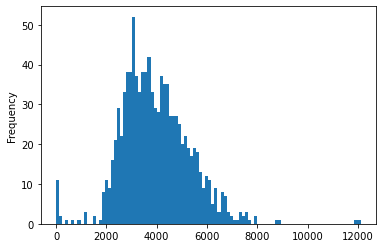

In [26]:
gdf['Total'].plot.hist(bins=100)

**Step 19**: sort the data from the largest to smallest

In [27]:
gdf_sorted = gdf.sort_values(by='Total',ascending = False)

In [28]:
gdf_sorted[['geoid','Total']].head(10)

,geoid,Total
922,14000US06037275602,12100.0
847,14000US06037265301,11977.0
531,14000US06037206020,8947.0
84,14000US06037111400,8735.0
128,14000US06037119002,7976.0
263,14000US06037132300,7912.0
705,14000US06037226700,7661.0
82,14000US06037111301,7552.0
301,14000US06037135203,7515.0
547,14000US06037208000,7508.0


**Step 20**: plot the 10 census tracts with the most population

<AxesSubplot:>

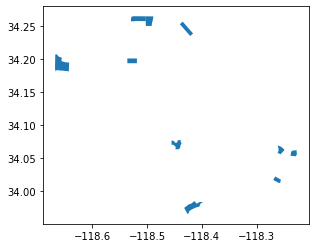

In [29]:
gdf_sorted.head(10).plot()

**Step 21**: make a prettier plot

<AxesSubplot:>

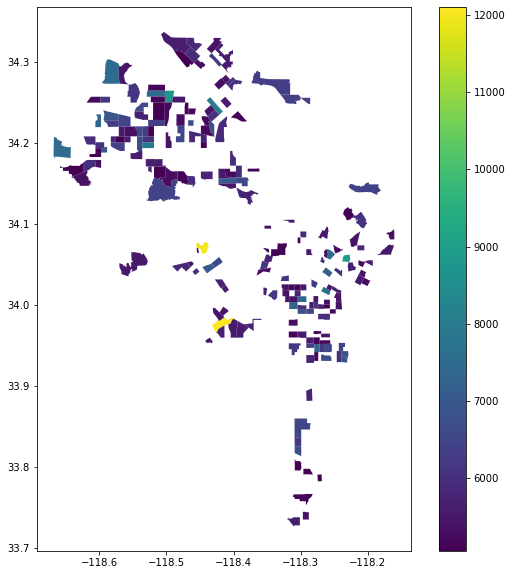

In [30]:
gdf_sorted.head(200).plot(figsize=(10,10),column='Total',legend=True)

**Step 22**: filter out the data with 0 population

In [31]:
gdf[gdf['Total']==0]

,geoid,name,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Two races including Some other race,"Two races excluding Some other race, and three or more races",geometry
995,14000US06037980020,"Census Tract 9800.20, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.34412 34.21700, -118.3438..."
997,14000US06037980022,"Census Tract 9800.22, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.50266 34.30809, -118.5026..."
998,14000US06037980023,"Census Tract 9800.23, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.64870 34.23120, -118.6480..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


**Step 23**: rename the variable

In [32]:
gdf_no_pop = gdf[gdf['Total']==0]

In [33]:
print('There are ' + str(len(gdf_no_pop)) + ' census tracts with no people in them')

There are 5 census tracts with no people in them


In [34]:
gdf_no_pop[['geoid','Total']]

,geoid,Total
995,14000US06037980020,0.0
997,14000US06037980022,0.0
998,14000US06037980023,0.0
1001,14000US06037980028,0.0
1003,14000US06037990200,0.0


**Step 24**: normalize the data (change it to percentage)

In [35]:
list(gdf)

['geoid',
 'name',
 'Total',
 'White alone',
 'Black or African American alone',
 'American Indian and Alaska Native alone',
 'Asian alone',
 'Native Hawaiian and Other Pacific Islander alone',
 'Some other race alone',
 'Two or more races',
 'Two races including Some other race',
 'Two races excluding Some other race, and three or more races',
 'geometry']

In [36]:
gdf['Percent White alone'] = gdf['White alone']/gdf['Total']*100
gdf['Percent Black or African American alone'] = gdf['Black or African American alone']/gdf['Total']*100
gdf['Percent American Indian and Alaska Native alone'] = gdf['American Indian and Alaska Native alone']/gdf['Total']*100
gdf['Percent Asian alone'] = gdf['Asian alone']/gdf['Total']*100
gdf['Percent Native Hawaiian and Other Pacific Islander alone'] = gdf['Native Hawaiian and Other Pacific Islander alone']/gdf['Total']*100
gdf['Percent Some other race alone'] = gdf['Some other race alone']/gdf['Total']*100
gdf['Percent Two or more races'] = gdf['Two or more races']/gdf['Total']*100

In [37]:
gdf.head()

,geoid,name,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Two races including Some other race,"Two races excluding Some other race, and three or more races",geometry,Percent White alone,Percent Black or African American alone,Percent American Indian and Alaska Native alone,Percent Asian alone,Percent Native Hawaiian and Other Pacific Islander alone,Percent Some other race alone,Percent Two or more races
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3347.0,19.0,3.0,331.0,3.0,391.0,189.0,34.0,155.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",78.146159,0.443614,0.070044,7.728228,0.070044,9.129115,4.412795
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,2981.0,74.0,15.0,220.0,0.0,48.0,67.0,0.0,67.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",87.547724,2.173275,0.440529,6.461087,0.000000,1.409692,1.967695
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,4647.0,198.0,0.0,486.0,0.0,921.0,95.0,48.0,47.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",73.215692,3.119584,0.000000,7.657161,0.000000,14.510793,1.496770
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2634.0,87.0,0.0,341.0,0.0,497.0,143.0,11.0,132.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",71.150729,2.350081,0.000000,9.211237,0.000000,13.425176,3.862777
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3350.0,205.0,0.0,194.0,0.0,45.0,90.0,28.0,62.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",86.251287,5.278064,0.000000,4.994851,0.000000,1.158599,2.317199


**Step 25**: map the data with natural breaks, equal interval and quantiles

<AxesSubplot:>

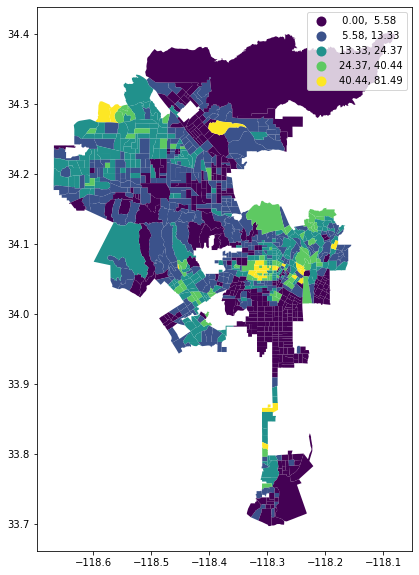

In [38]:
gdf.plot(figsize=(12,10),
                 column='Percent Asian alone',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot:>

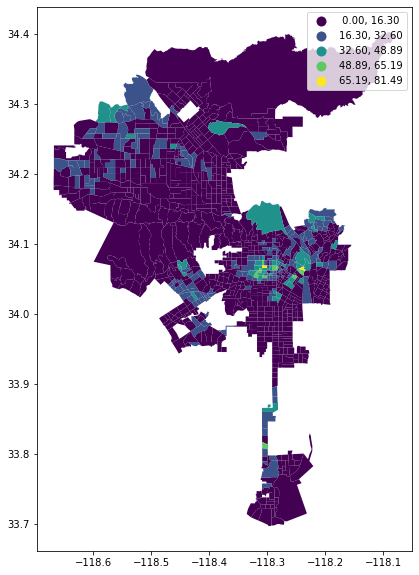

In [39]:
gdf.plot(figsize=(12,10),
                 column='Percent Asian alone',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot:>

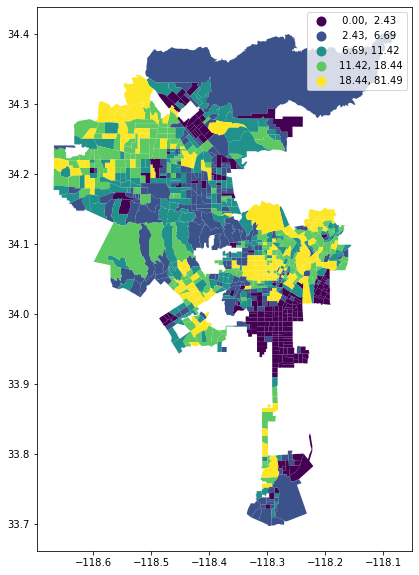

In [40]:
gdf.plot(figsize=(12,10),
                 column='Percent Asian alone',
                 legend=True, 
                 scheme='quantiles')

**Step 26**: create multiple plots

Text(0.5, 1.0, 'Percent Black or African American alone')

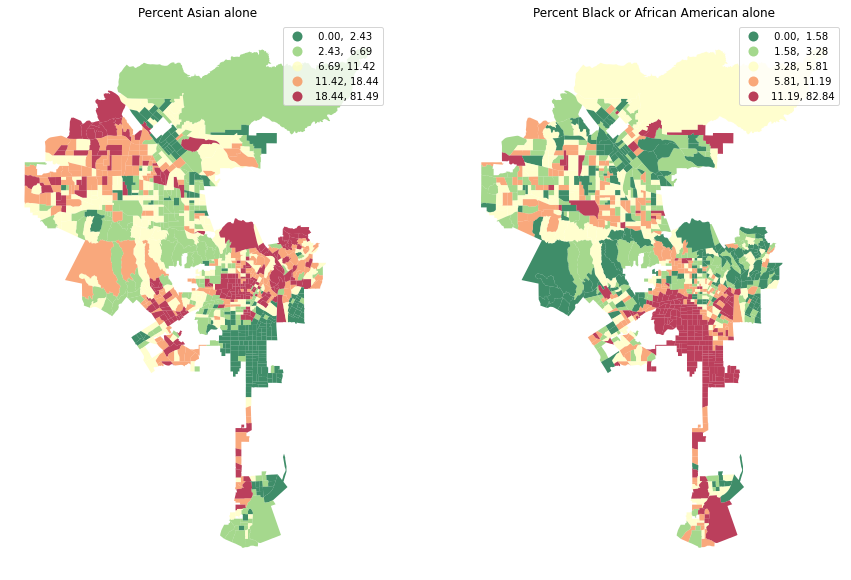

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

ax1, ax2 = axs

# percent asian alone map on the left
gdf.plot(column='Percent Asian alone', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Asian alone")

# percent Black or African American alone map on the right
gdf.plot(column='Percent Black or African American alone', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Black or African American alone")

In [42]:
gdf[gdf['Percent Black or African American alone'] > 50]

,geoid,name,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Two races including Some other race,"Two races excluding Some other race, and three or more races",geometry,Percent White alone,Percent Black or African American alone,Percent American Indian and Alaska Native alone,Percent Asian alone,Percent Native Hawaiian and Other Pacific Islander alone,Percent Some other race alone,Percent Two or more races
536,14000US06037206300,"Census Tract 2063, Los Angeles, CA",6103.0,1983.0,3097.0,140.0,142.0,25.0,407.0,309.0,40.0,269.0,"MULTIPOLYGON (((-118.25041 34.04326, -118.2490...",32.492217,50.745535,2.293954,2.326725,0.409635,6.668851,5.063084
668,14000US06037220100,"Census Tract 2201, Los Angeles, CA",2415.0,590.0,1327.0,0.0,232.0,0.0,152.0,114.0,22.0,92.0,"MULTIPOLYGON (((-118.37800 34.02210, -118.3777...",24.430642,54.948240,0.000000,9.606625,0.000000,6.293996,4.720497
746,14000US06037234000,"Census Tract 2340, Los Angeles, CA",5417.0,1259.0,3201.0,12.0,26.0,0.0,774.0,145.0,4.0,141.0,"MULTIPOLYGON (((-118.32752 34.01968, -118.3251...",23.241647,59.091748,0.221525,0.479970,0.000000,14.288351,2.676758
747,14000US06037234200,"Census Tract 2342, Los Angeles, CA",2424.0,401.0,1694.0,0.0,184.0,30.0,33.0,82.0,0.0,82.0,"MULTIPOLYGON (((-118.33510 34.02143, -118.3351...",16.542904,69.884488,0.000000,7.590759,1.237624,1.361386,3.382838
748,14000US06037234300,"Census Tract 2343, Los Angeles, CA",3805.0,339.0,2970.0,0.0,96.0,0.0,210.0,190.0,32.0,158.0,"MULTIPOLYGON (((-118.33569 34.00826, -118.3356...",8.909330,78.055191,0.000000,2.522996,0.000000,5.519054,4.993430
749,14000US06037234501,"Census Tract 2345.01, Los Angeles, CA",2845.0,876.0,1584.0,7.0,27.0,0.0,276.0,75.0,0.0,75.0,"MULTIPOLYGON (((-118.33217 33.99633, -118.3316...",30.790861,55.676626,0.246046,0.949033,0.000000,9.701230,2.636204
750,14000US06037234502,"Census Tract 2345.02, Los Angeles, CA",3017.0,641.0,1920.0,40.0,49.0,0.0,342.0,25.0,9.0,16.0,"MULTIPOLYGON (((-118.33237 34.00345, -118.3323...",21.246271,63.639377,1.325820,1.624130,0.000000,11.335764,0.828638
751,14000US06037234600,"Census Tract 2346, Los Angeles, CA",4908.0,589.0,2503.0,0.0,88.0,0.0,1610.0,118.0,7.0,111.0,"MULTIPOLYGON (((-118.33775 33.98947, -118.3377...",12.000815,50.998370,0.000000,1.792991,0.000000,32.803586,2.404238
752,14000US06037234700,"Census Tract 2347, Los Angeles, CA",3690.0,974.0,2031.0,0.0,1.0,0.0,613.0,71.0,27.0,44.0,"MULTIPOLYGON (((-118.33779 33.98626, -118.3377...",26.395664,55.040650,0.000000,0.027100,0.000000,16.612466,1.924119
753,14000US06037234800,"Census Tract 2348, Los Angeles, CA",3317.0,787.0,1737.0,18.0,0.0,46.0,636.0,93.0,7.0,86.0,"MULTIPOLYGON (((-118.32649 33.97923, -118.3264...",23.726259,52.366596,0.542659,0.000000,1.386795,19.173952,2.803738


**Step 27**: creat a "percent black or African American alone" plot with a base map

<AxesSubplot:>

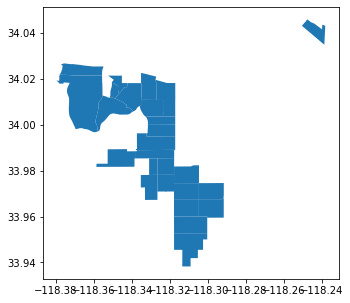

In [50]:
gdf[gdf['Percent Black or African American alone'] > 50].plot(figsize=(10,5))

In [45]:
gdf_web_mercator = gdf.to_crs(epsg=3857)

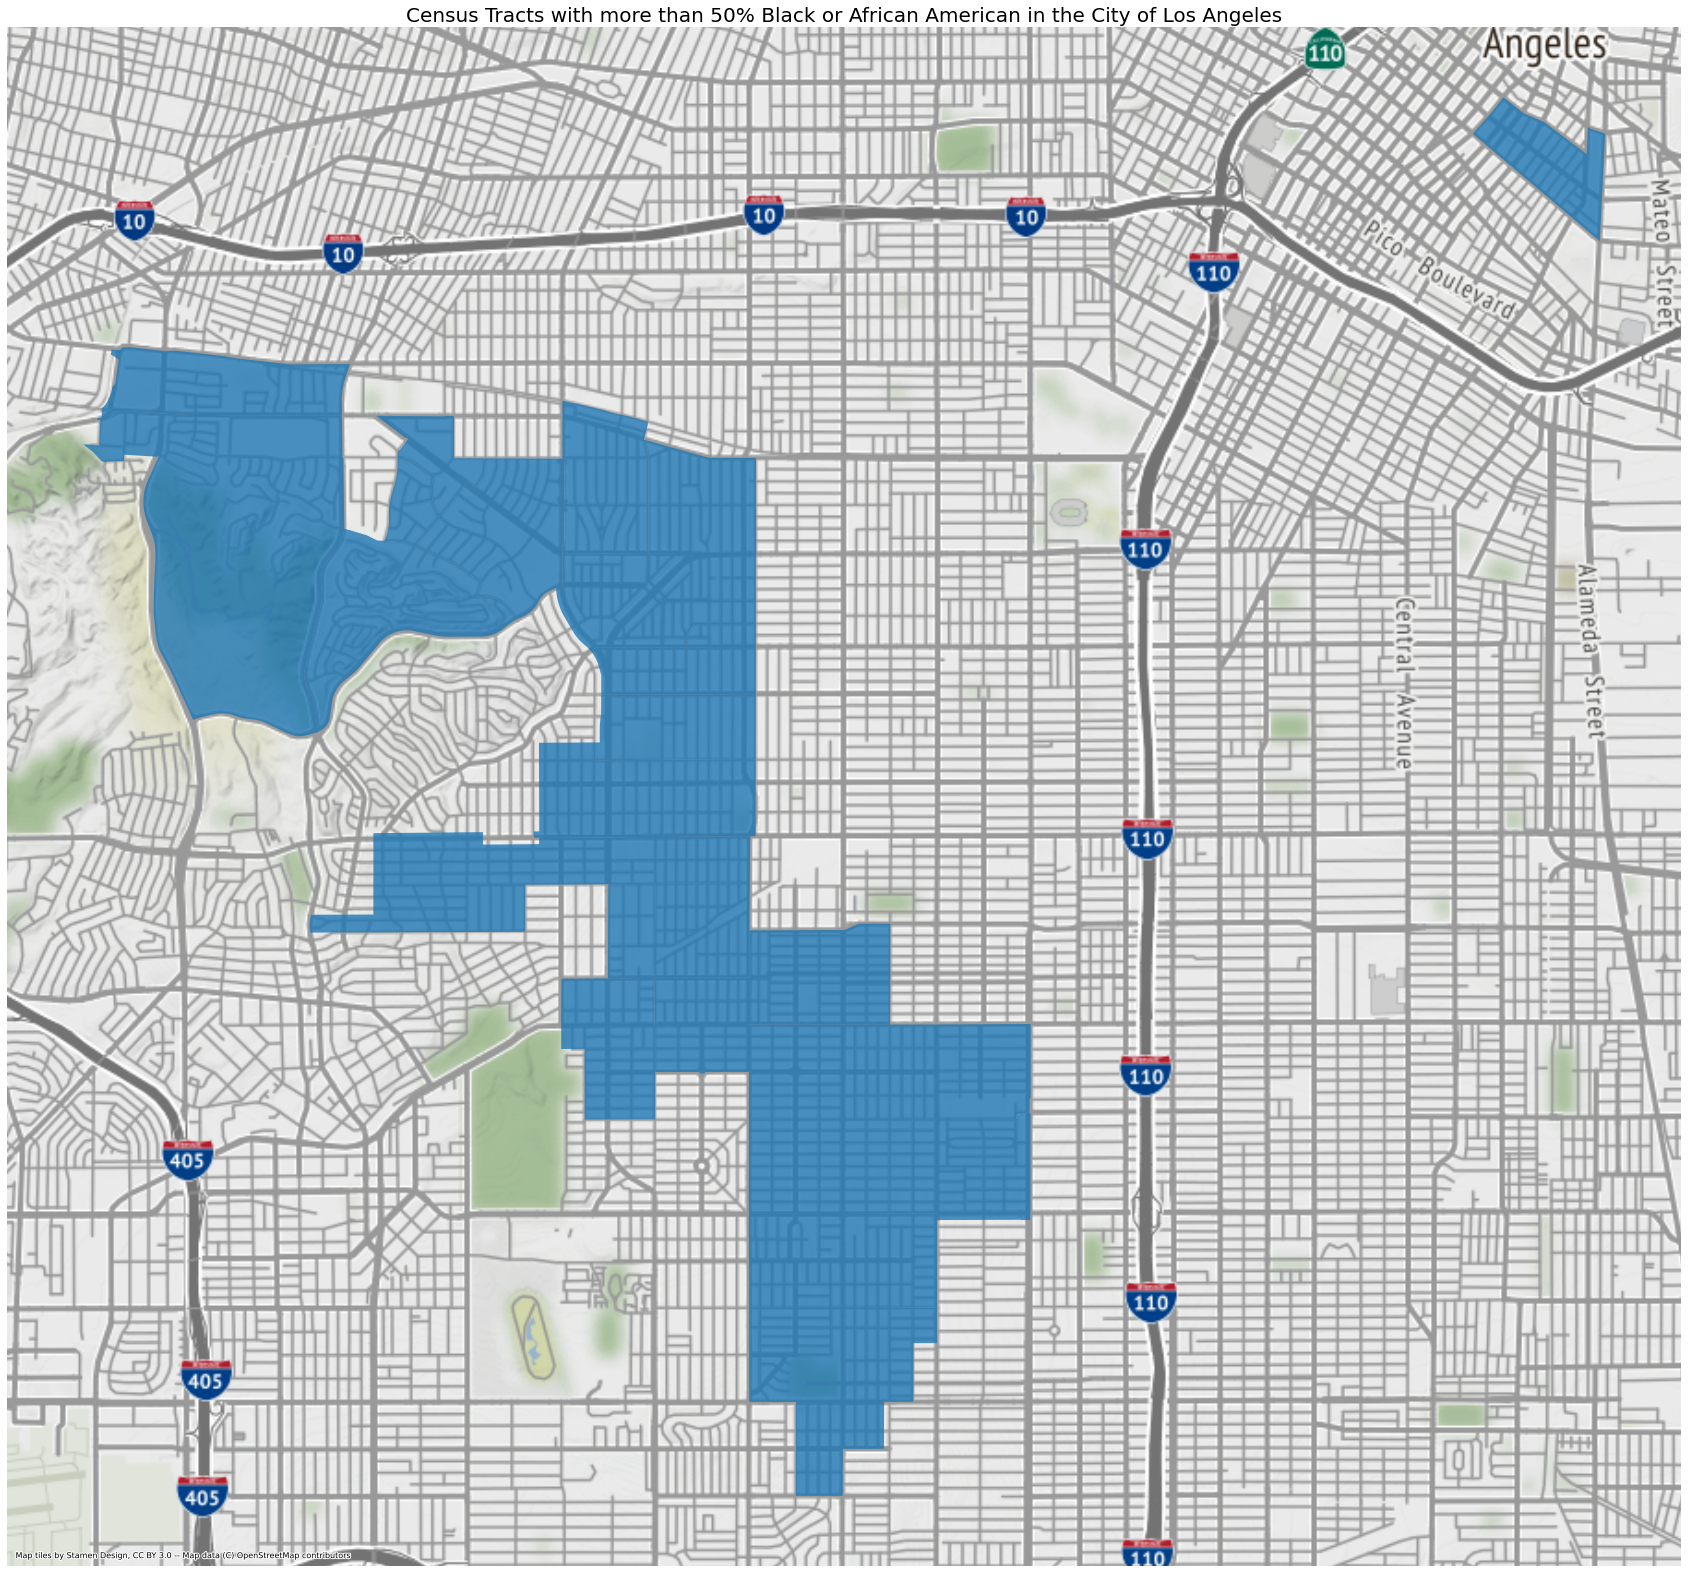

In [52]:
fig, ax = plt.subplots(figsize=(30, 30))

gdf_web_mercator[gdf_web_mercator['Percent Black or African American alone'] > 50].plot(ax=ax, alpha=0.8)

ax.axis('off')

ax.set_title('Census Tracts with more than 50% Black or African American in the City of Los Angeles',fontsize=20)

ctx.add_basemap(ax)